In [200]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [201]:
df = pd.read_csv('kc_house_data.csv')

In [202]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [203]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [204]:
col_to_drop = ['id', 'lat', 'long', 'date', 'sqft_living15', 'sqft_lot15', 'floors', 'waterfront', 'yr_built']
df.drop(col_to_drop, axis=1, inplace=True)

In [205]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode
0,221900.0,3,1.00,1180,5650,0,3,7,1180.0,0,0,98178
1,538000.0,3,2.25,2570,7242,0,3,7,2170.0,400,1991,98125
2,180000.0,2,1.00,770,10000,0,3,6,770.0,0,0,98028
3,604000.0,4,3.00,1960,5000,0,5,7,1050.0,910,0,98136
4,510000.0,3,2.00,1680,8080,0,3,8,1680.0,0,0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,0,3,8,1530.0,0,0,98103
21609,400000.0,4,2.50,2310,5813,0,3,8,2310.0,0,0,98146
21610,402101.0,2,0.75,1020,1350,0,3,7,1020.0,0,0,98144
21611,400000.0,3,2.50,1600,2388,0,3,8,1600.0,0,0,98027


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   view           21613 non-null  int64  
 6   condition      21613 non-null  int64  
 7   grade          21613 non-null  int64  
 8   sqft_above     21611 non-null  float64
 9   sqft_basement  21613 non-null  int64  
 10  yr_renovated   21613 non-null  int64  
 11  zipcode        21613 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 2.0 MB


In [207]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,0.234303,3.409430,7.656873,1788.396095,291.509045,84.402258,98077.939805
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.766318,0.650743,1.175459,828.128162,442.575043,401.679240,53.505026
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,1.000000,1.000000,290.000000,0.000000,0.000000,98001.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,0.000000,3.000000,7.000000,1190.000000,0.000000,0.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,3.000000,7.000000,1560.000000,0.000000,0.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,0.000000,4.000000,8.000000,2210.000000,560.000000,0.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000


In [208]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.397293,0.036362,0.667434,0.605567,0.323816,0.126434,-0.053203
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.079532,0.028472,0.356967,0.477616,0.303093,0.018841,-0.152668
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.187737,-0.124982,0.664983,0.685363,0.283770,0.050739,-0.203866
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.284611,-0.058753,0.762704,0.876644,0.435043,0.055363,-0.199430
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,0.074710,-0.008958,0.113621,0.183511,0.015286,0.007644,-0.129574
view,0.397293,0.079532,0.187737,0.284611,0.074710,1.000000,0.045990,0.251321,0.167648,0.276947,0.103917,0.084827
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,0.045990,1.000000,-0.144674,-0.158206,0.174105,-0.060618,0.003026
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.251321,-0.144674,1.000000,0.755924,0.168392,0.014414,-0.184862
sqft_above,0.605567,0.477616,0.685363,0.876644,0.183511,0.167648,-0.158206,0.755924,1.000000,-0.051976,0.023283,-0.261192
sqft_basement,0.323816,0.303093,0.283770,0.435043,0.015286,0.276947,0.174105,0.168392,-0.051976,1.000000,0.071323,0.074845


<AxesSubplot:>

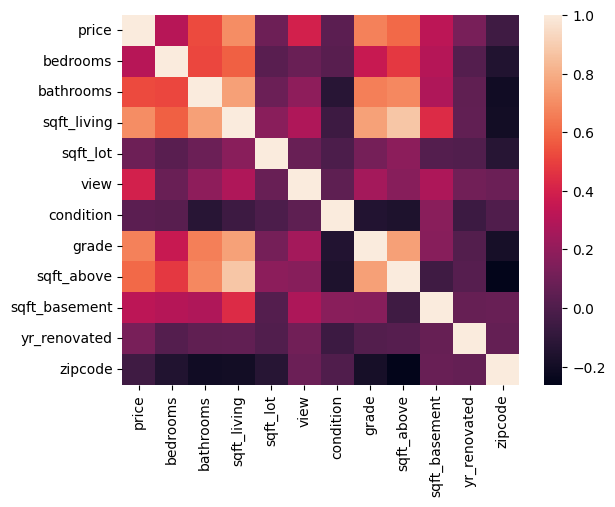

In [209]:
sns.heatmap(df.corr(), annot=False,fmt='.2f')

In [210]:
#bedroom: categorical   
#bathroom : categorical.  
#square ft living: continuous.    
#sqftlot: continuous      
#view =  categorical   
#condition = categorical 
#grade is categorical.    
#sqft above = continuous.    
#sqft basement = continuous.       
#zip code = categorical.  
#yr renovated = categorical. swict to 1 or 0 for renovated or not.  
#Zipcode = is unique so should we take zipcode out or should we link room zise to zip code.

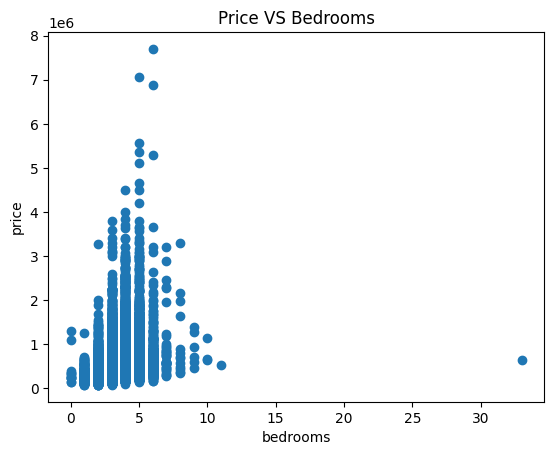

In [211]:
plt.scatter(df['bedrooms'],df['price'])
plt.title('Price VS Bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show()



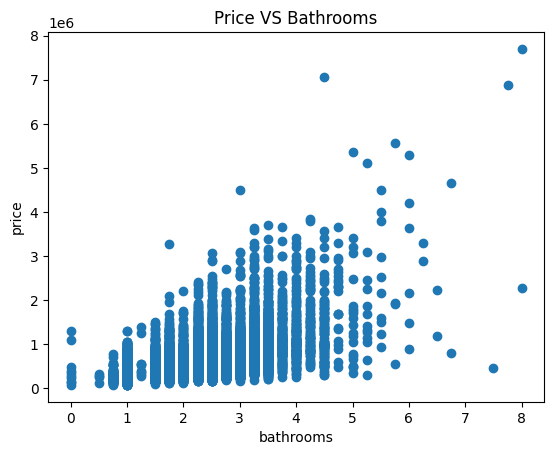

In [212]:

plt.scatter(df['bathrooms'],df['price'])
plt.title('Price VS Bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.show()

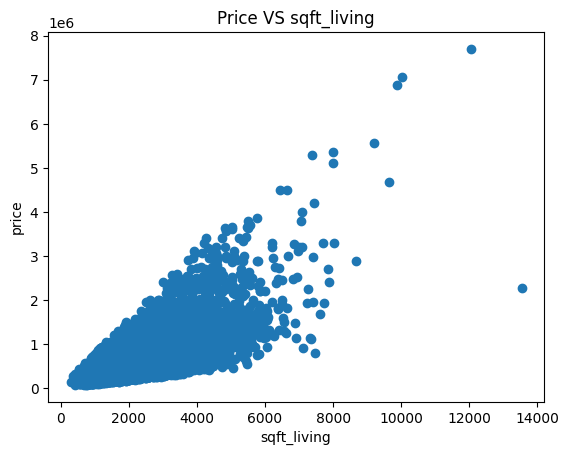

In [213]:

plt.scatter(df['sqft_living'],df['price'])
plt.title('Price VS sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

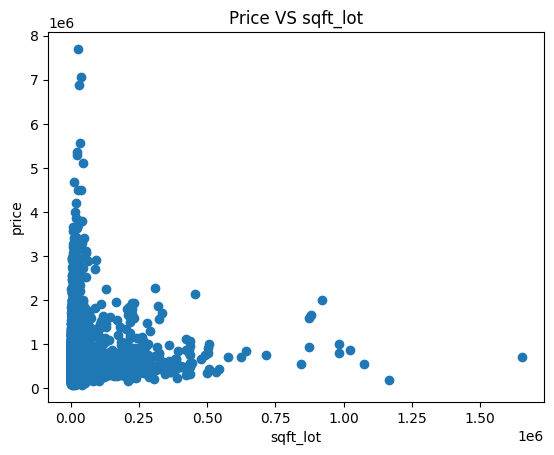

In [214]:
plt.scatter(df['sqft_lot'],df['price'])
plt.title('Price VS sqft_lot')
plt.xlabel('sqft_lot')
plt.ylabel('price')
plt.show()

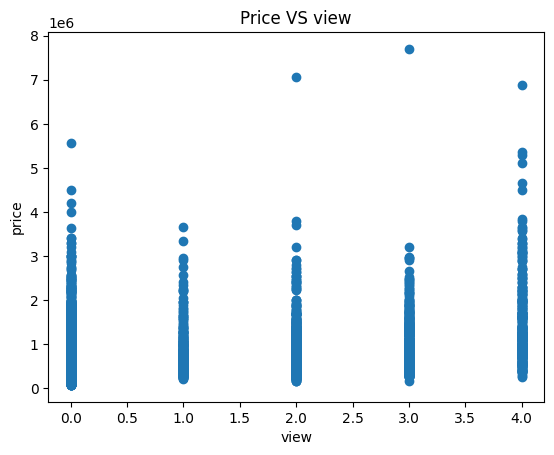

In [215]:
plt.scatter(df['view'],df['price'])
plt.title('Price VS view')
plt.xlabel('view')
plt.ylabel('price')
plt.show()

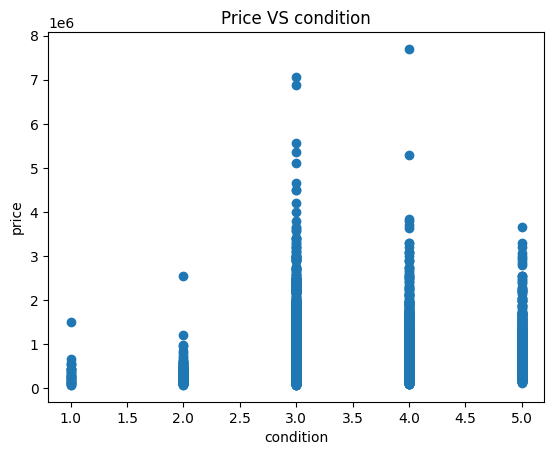

In [216]:
plt.scatter(df['condition'],df['price'])
plt.title('Price VS condition')
plt.xlabel('condition')
plt.ylabel('price')
plt.show()

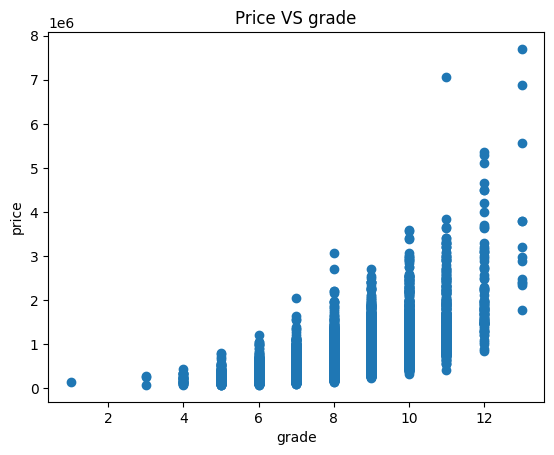

In [217]:
plt.scatter(df['grade'],df['price'])
plt.title('Price VS grade')
plt.xlabel('grade')
plt.ylabel('price')
plt.show()

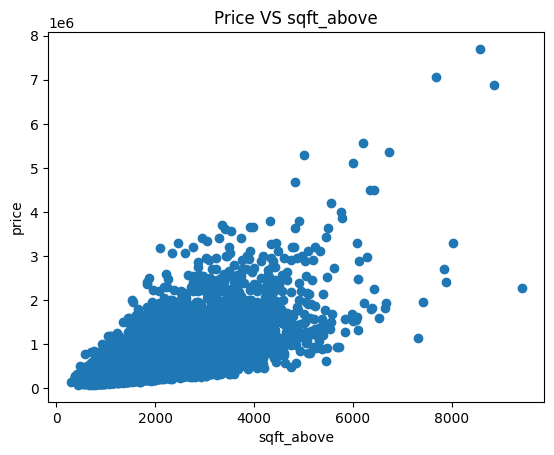

In [218]:
plt.scatter(df['sqft_above'],df['price'])
plt.title('Price VS sqft_above')
plt.xlabel('sqft_above')
plt.ylabel('price')
plt.show()

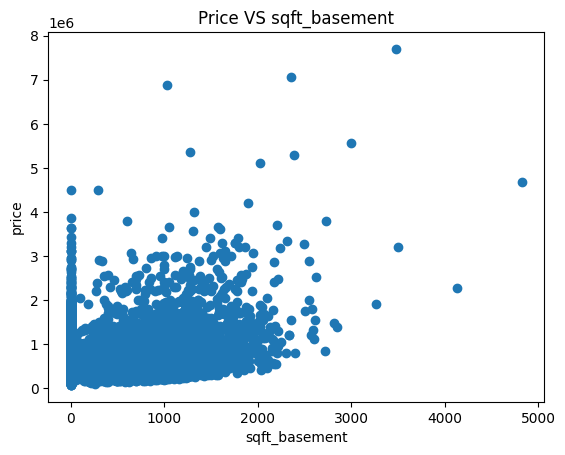

In [219]:
plt.scatter(df['sqft_basement'],df['price'])
plt.title('Price VS sqft_basement')
plt.xlabel('sqft_basement')
plt.ylabel('price')
plt.show()

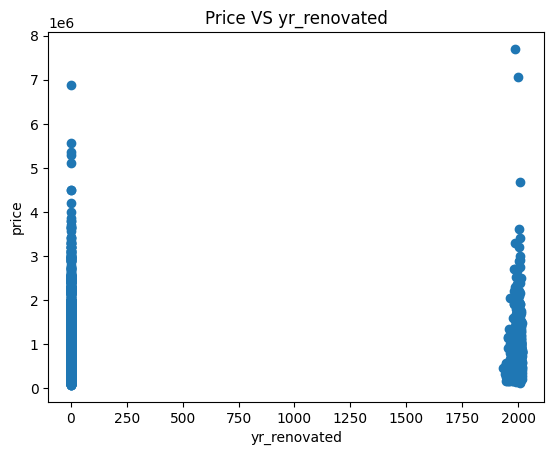

In [220]:

plt.scatter(df['yr_renovated'],df['price'])
plt.title('Price VS yr_renovated')
plt.xlabel('yr_renovated')
plt.ylabel('price')
plt.show()

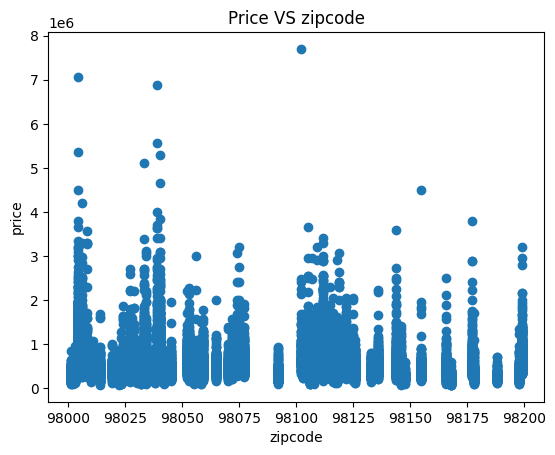

In [221]:
plt.scatter(df['zipcode'],df['price'])
plt.title('Price VS zipcode')
plt.xlabel('zipcode')
plt.ylabel('price')
plt.show()

In [222]:
abs(df.corr()) > 0.5

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode
price,True,False,True,True,False,False,False,True,True,False,False,False
bedrooms,False,True,True,True,False,False,False,False,False,False,False,False
bathrooms,True,True,True,True,False,False,False,True,True,False,False,False
sqft_living,True,True,True,True,False,False,False,True,True,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False
view,False,False,False,False,False,True,False,False,False,False,False,False
condition,False,False,False,False,False,False,True,False,False,False,False,False
grade,True,False,True,True,False,False,False,True,True,False,False,False
sqft_above,True,False,True,True,False,False,False,True,True,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,False,True,False,False


In [223]:
#0 = not renovated
#1 = renovated

df['yr_renovated']=pd.factorize(df['yr_renovated'])[0]

In [224]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode
0,221900.0,3,1.00,1180,5650,0,3,7,1180.0,0,0,98178
1,538000.0,3,2.25,2570,7242,0,3,7,2170.0,400,1,98125
2,180000.0,2,1.00,770,10000,0,3,6,770.0,0,0,98028
3,604000.0,4,3.00,1960,5000,0,5,7,1050.0,910,0,98136
4,510000.0,3,2.00,1680,8080,0,3,8,1680.0,0,0,98074


In [225]:
df[[ 'price','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement' ]].corr()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement
price,1.000000,0.702035,0.089661,0.605567,0.323816
sqft_living,0.702035,1.000000,0.172826,0.876644,0.435043
sqft_lot,0.089661,0.172826,1.000000,0.183511,0.015286
sqft_above,0.605567,0.876644,0.183511,1.000000,-0.051976
sqft_basement,0.323816,0.435043,0.015286,-0.051976,1.000000


<AxesSubplot:>

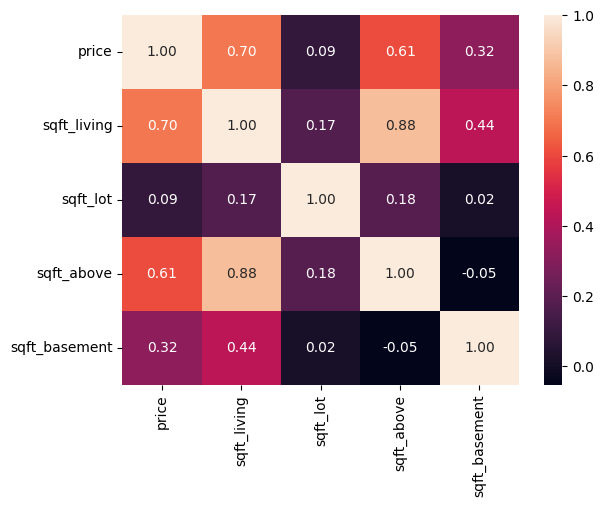

In [226]:
sns.heatmap(df[[ 'price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement'  ]].corr(), annot=True,fmt='.2f')

In [227]:
col_to_drop = ['sqft_lot', 'sqft_basement']
df.drop(col_to_drop, axis=1, inplace=True)

In [228]:
df.head()

,price,bedrooms,bathrooms,sqft_living,view,condition,grade,sqft_above,yr_renovated,zipcode
0,221900.0,3,1.00,1180,0,3,7,1180.0,0,98178
1,538000.0,3,2.25,2570,0,3,7,2170.0,1,98125
2,180000.0,2,1.00,770,0,3,6,770.0,0,98028
3,604000.0,4,3.00,1960,0,5,7,1050.0,0,98136
4,510000.0,3,2.00,1680,0,3,8,1680.0,0,98074


In [229]:
df.isnull().sum()

price           0
bedrooms        0
bathrooms       0
sqft_living     0
view            0
condition       0
grade           0
sqft_above      2
yr_renovated    0
zipcode         0
dtype: int64

In [230]:
df = df.dropna()

In [231]:
df.isnull().sum()

price           0
bedrooms        0
bathrooms       0
sqft_living     0
view            0
condition       0
grade           0
sqft_above      0
yr_renovated    0
zipcode         0
dtype: int64

In [232]:
df

,price,bedrooms,bathrooms,sqft_living,view,condition,grade,sqft_above,yr_renovated,zipcode
0,221900.0,3,1.00,1180,0,3,7,1180.0,0,98178
1,538000.0,3,2.25,2570,0,3,7,2170.0,1,98125
2,180000.0,2,1.00,770,0,3,6,770.0,0,98028
3,604000.0,4,3.00,1960,0,5,7,1050.0,0,98136
4,510000.0,3,2.00,1680,0,3,8,1680.0,0,98074
...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,0,3,8,1530.0,0,98103
21609,400000.0,4,2.50,2310,0,3,8,2310.0,0,98146
21610,402101.0,2,0.75,1020,0,3,7,1020.0,0,98144
21611,400000.0,3,2.50,1600,0,3,8,1600.0,0,98027
